In [1]:
import numpy as np
import pandas as pd

## CelebAの属性をロード

In [2]:
attr_names = [
    "5_o_Clock_Shadow", "Arched_Eyebrows", "Attractive", "Bags_Under_Eyes", "Bald", "Bangs",
    "Big_Lips", "Big_Nose", "Black_Hair", "Blond_Hair", "Blurry", "Brown_Hair", "Bushy_Eyebrows",
    "Chubby", "Double_Chin", "Eyeglasses", "Goatee", "Gray_Hair", "Heavy_Makeup", "High_Cheekbones",
    "Male", "Mouth_Slightly_Open", "Mustache", "Narrow_Eyes", "No_Beard", "Oval_Face", "Pale_Skin",
    "Pointy_Nose", "Receding_Hairline", "Rosy_Cheeks", "Sideburns", "Smiling", "Straight_Hair",
    "Wavy_Hair", "Wearing_Earrings", "Wearing_Hat", "Wearing_Lipstick", "Wearing_Necklace",
    "Wearing_Necktie", "Young"
]


In [3]:
def load_attr(attr_fpath):
    with open(attr_fpath, 'r') as f:
        lines = f.readlines()
    df = []
    for line in lines[2:]:
        line = np.array(line.split())
        df.append(line)
    df = pd.DataFrame(df)
    df.columns = ['image_id'] + lines[1].strip().split(' ')
    return df

In [4]:
df = load_attr('../../data/celeba/list_attr_celeba.txt')

In [5]:
df.head()

image_id 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes  \
0  000001.jpg               -1               1          1              -1   
1  000002.jpg               -1              -1         -1               1   
2  000003.jpg               -1              -1         -1              -1   
3  000004.jpg               -1              -1          1              -1   
4  000005.jpg               -1               1          1              -1   

  Bald Bangs Big_Lips Big_Nose Black_Hair  ... Sideburns Smiling  \
0   -1    -1       -1       -1         -1  ...        -1       1   
1   -1    -1       -1        1         -1  ...        -1       1   
2   -1    -1        1       -1         -1  ...        -1      -1   
3   -1    -1       -1       -1         -1  ...        -1      -1   
4   -1    -1        1       -1         -1  ...        -1      -1   

  Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick  \
0             1        -1                1          -1                1   
1            -1        -1               -1          -1               -1   
2            -1         1               -1          -1               -1   
3             1        -1                1          -1                1   
4            -1        -1               -1          -1                1   

  Wearing_Necklace Wearing_Necktie Young  
0               -1              -1     1  
1               -1              -1     1  
2               -1              -1     1  
3                1              -1     1  
4               -1              -1     1  

[5 rows x 41 columns]

In [24]:
all = list(df['image_id'])
print(len(all))

202599


In [6]:
eyeglasses = list(df[df['Eyeglasses'] == '1']['image_id'])
print(len(eyeglasses), eyeglasses[:10])

13193 ['000053.jpg', '000093.jpg', '000119.jpg', '000144.jpg', '000152.jpg', '000154.jpg', '000188.jpg', '000189.jpg', '000193.jpg', '000202.jpg']


In [7]:
smiling = list(df[df['Smiling'] == '1']['image_id'])
print(len(smiling), smiling[:10])

97669 ['000001.jpg', '000002.jpg', '000009.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000016.jpg', '000017.jpg', '000018.jpg']


In [8]:
blonde = list(df[df['Blond_Hair'] == '1']['image_id'])
print(len(blonde), blonde[:10])

29983 ['000013.jpg', '000018.jpg', '000019.jpg', '000022.jpg', '000024.jpg', '000029.jpg', '000054.jpg', '000071.jpg', '000092.jpg', '000094.jpg']


In [9]:
male = list(df[df['Male'] == '1']['image_id'])
print(len(male), male[:10])

84434 ['000003.jpg', '000007.jpg', '000008.jpg', '000012.jpg', '000013.jpg', '000015.jpg', '000016.jpg', '000020.jpg', '000021.jpg', '000023.jpg']


## 属性ごとのDataLoaderクラスを作成

- 特定の属性のファイルリストからなるDatasetを作りたい

In [10]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.io import read_image


class CelebADataset(Dataset):
    def __init__(self, img_dir, img_files, transform=None):
        self.img_dir = img_dir
        self.img_files = img_files
        self.transform = transform
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_files[index])
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)
        return image

In [11]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(148),
    transforms.Resize(128),
    transforms.ConvertImageDtype(torch.float32),
])

In [26]:
all_dataset = CelebADataset('../../data/celeba/img_align_celeba', all, transform)
eyeglasses_dataset = CelebADataset('../../data/celeba/img_align_celeba', eyeglasses, transform)
smiling_dataset = CelebADataset('../../data/celeba/img_align_celeba', smiling, transform)
blonde_dataset = CelebADataset('../../data/celeba/img_align_celeba', blonde, transform)
male_dataset = CelebADataset('../../data/celeba/img_align_celeba', male, transform)
print(len(all_dataset))
print(len(eyeglasses_dataset))
print(len(smiling_dataset))
print(len(blonde_dataset))
print(len(male_dataset))

202599
13193
97669
29983
84434


In [27]:
all_loader = DataLoader(all_dataset, batch_size=64, num_workers=8, shuffle=True, drop_last=True)
eyeglasses_loader = DataLoader(eyeglasses_dataset, batch_size=64, num_workers=8, shuffle=True, drop_last=True)
smiling_loader = DataLoader(smiling_dataset, batch_size=64, num_workers=8, shuffle=True, drop_last=True)
blonde_loader = DataLoader(blonde_dataset, batch_size=64, num_workers=8, shuffle=True, drop_last=True)
male_loader = DataLoader(male_dataset, batch_size=64, num_workers=8, shuffle=True, drop_last=True)

In [14]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

img = make_grid(next(iter(eyeglasses_loader)), normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

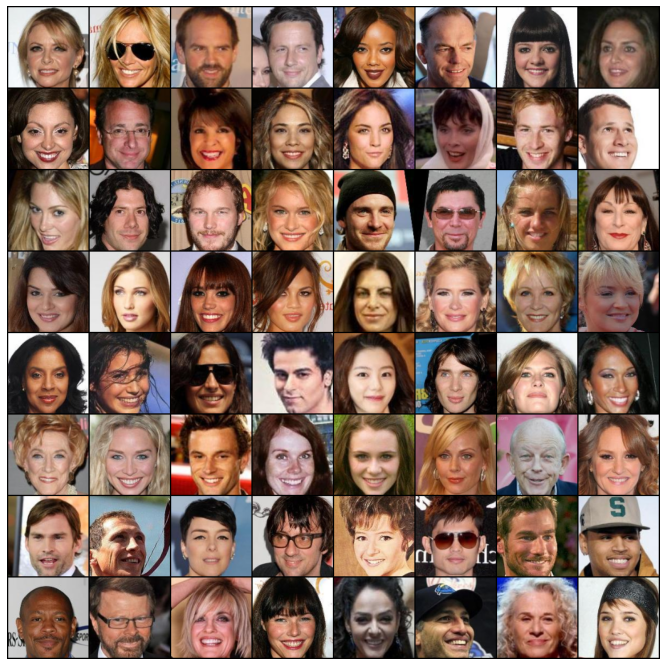

In [15]:
img = make_grid(next(iter(smiling_loader)), normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

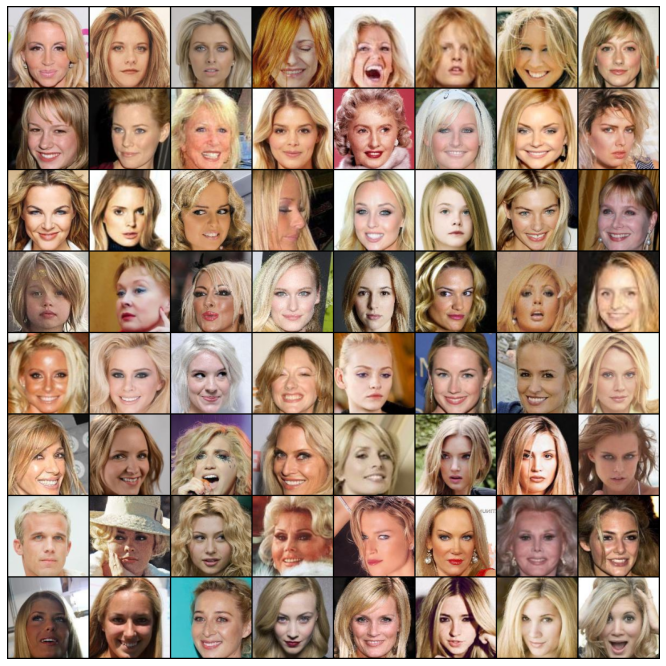

In [16]:
img = make_grid(next(iter(blonde_loader)), normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

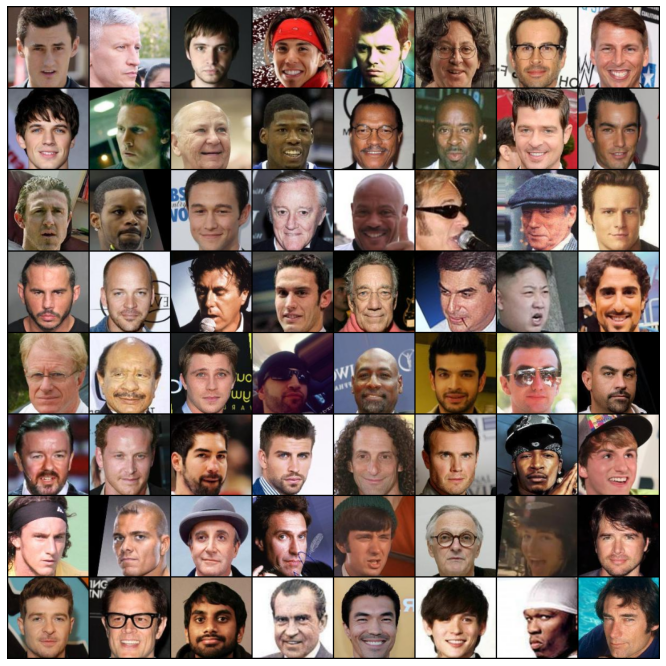

In [17]:
img = make_grid(next(iter(male_loader)), normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

## 訓練済みVAEを使って属性ごとに潜在表現を取得

In [18]:
import sys
sys.path.append('../../')

In [19]:
from vanilla_vae_celeba import VanillaVAE

checkpoint_path = '../../lightning_logs/vanilla_vae_celeba/version_0/checkpoints/epoch=199-step=1017199.ckpt'
model = VanillaVAE.load_from_checkpoint(checkpoint_path, in_channels=3, latent_dim=128)

In [20]:
eyeglasses = list(df[df['Eyeglasses'] == '1']['image_id'])
len(eyeglasses)

13193

In [21]:
not_eyeglasses = list(df[df['Eyeglasses'] == '-1']['image_id'])
len(not_eyeglasses)

189406

In [41]:
def get_vector_from_label(target_label, attr_df, img_dir, transform):
    target = list(df[df[target_label] == '1']['image_id'])
    not_target = list(df[df[target_label] == '-1']['image_id'])

    target_dataset = CelebADataset(img_dir, target, transform)
    not_target_dataset = CelebADataset(img_dir, not_target, transform)
    target_loader = DataLoader(target_dataset, batch_size=10000, num_workers=8, shuffle=True)
    not_target_loader = DataLoader(not_target_dataset, batch_size=10000, num_workers=8, shuffle=True)

    target_z, _ = model.encoder(next(iter(target_loader)))
    not_target_z, _ = model.encoder(next(iter(not_target_loader)))

    target_mean = target_z.mean(dim=0)
    not_target_mean = not_target_z.mean(dim=0)

    feature_vector = target_mean - not_target_mean

    return feature_vector

## Eyeglasses

In [23]:
feature_vector = get_vector_from_label( 'Eyeglasses', df, '../../data/celeba/img_align_celeba', transform)
feature_vector.shape

Traceback (most recent call last):
  File "/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/shutil.py", line 719, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/shutil.py", line 717, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4auf2sg7'


torch.Size([200])

In [28]:
batch = next(iter(all_loader))
batch.shape

torch.Size([64, 3, 128, 128])

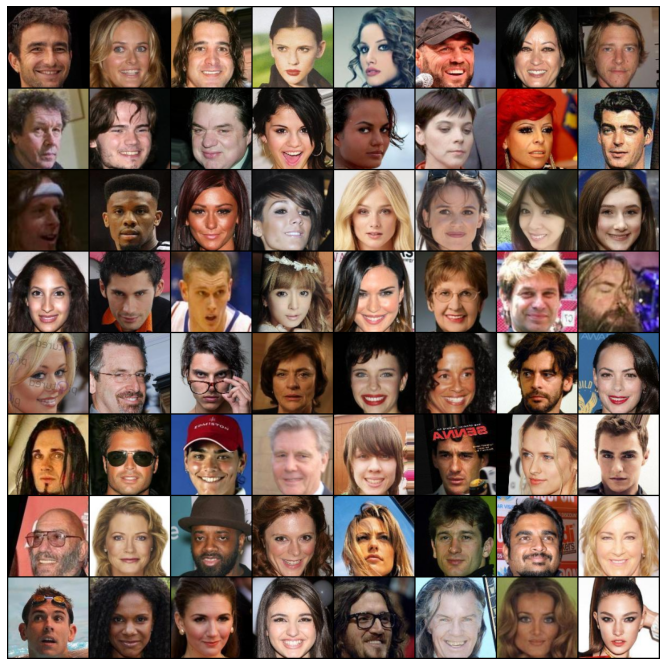

In [30]:
img = make_grid(batch, normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

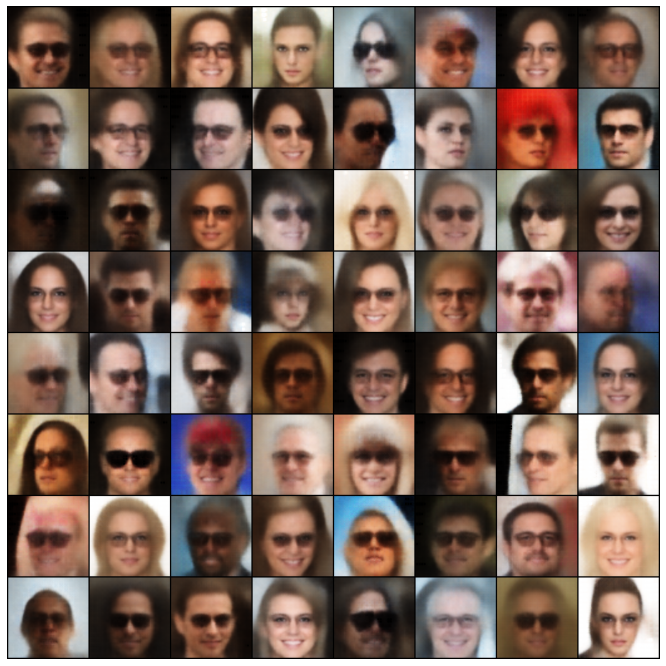

In [39]:
z, _ = model.encoder(batch)
z = z + 2.0 * feature_vector
recon_imgs = model.decoder(z)

img = make_grid(recon_imgs, normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

## Blonde

In [42]:
feature_vector = get_vector_from_label( 'Blond_Hair', df, '../../data/celeba/img_align_celeba', transform)
feature_vector.shape

torch.Size([200])

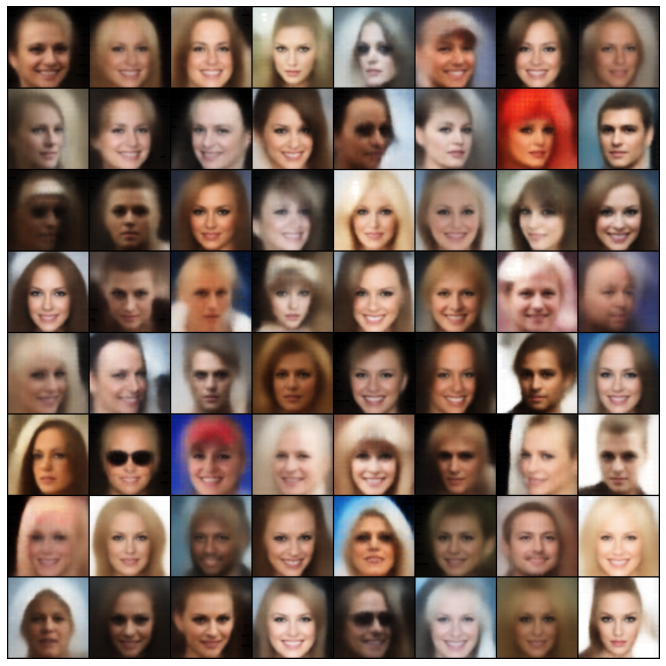

In [46]:
z, _ = model.encoder(batch)
z = z + 2.0 * feature_vector
recon_imgs = model.decoder(z)

img = make_grid(recon_imgs, normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

## Smiling

In [47]:
feature_vector = get_vector_from_label( 'Smiling', df, '../../data/celeba/img_align_celeba', transform)
feature_vector.shape

torch.Size([200])

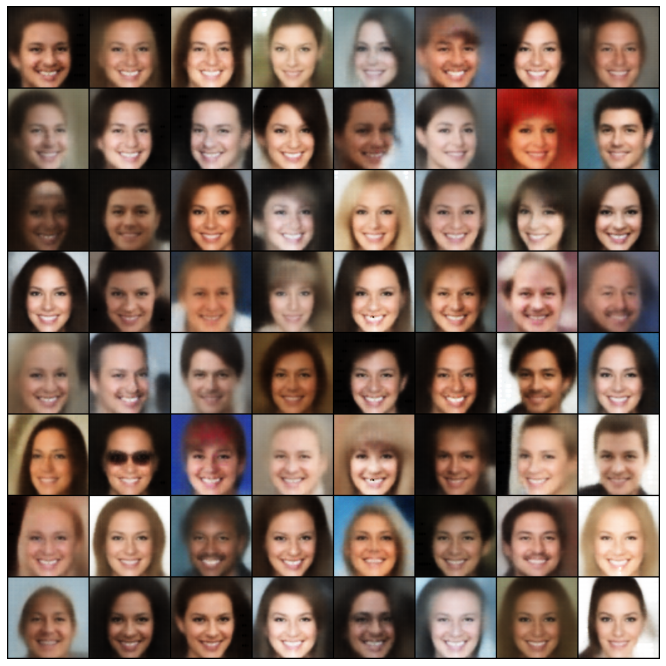

In [48]:
z, _ = model.encoder(batch)
z = z + 2.0 * feature_vector
recon_imgs = model.decoder(z)

img = make_grid(recon_imgs, normalize=True, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0))
